<a href="https://colab.research.google.com/github/ML-HW-SYS/a1-anya-23-ct/blob/main/mlhwa1_22feb_morning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

In [ ]:
import platform
print("Processor:", platform.processor())

Processor: x86_64


In [ ]:
!nvidia-smi

Thu Feb 22 10:45:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Chip Analysis

In [133]:
import matplotlib.pyplot as plt

def plot_roofline(device, flops, memory_bandwidth, color):
    plt.scatter(memory_bandwidth, flops, color=color, label=device)
    plt.plot([0, memory_bandwidth, 3000], [0, flops, flops], color=color)  # Roofline

In [136]:
# Example data for multiple devices
devices = ['CPU', 'GPU', 'GPU2','ASIC', 'SoC']
flops_values = [3*10**6, 81*10**6, 51*10**6, 275*10**6, 2.6*10**6]  # FLOPs/s
memory_bandwidth_values = [33, 320, 2*10**3, 1200, 66.7]  # Memory bandwidth (GB/s)

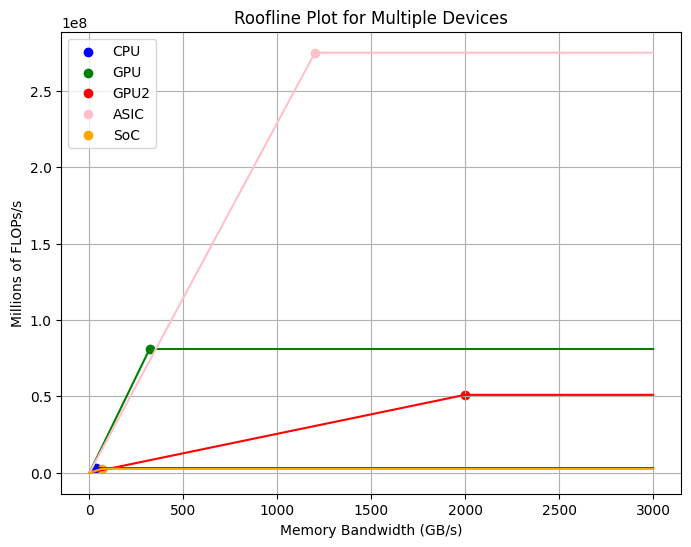

In [138]:
colors = ['blue', 'green', 'red', 'pink','orange']  # Colors for each device

plt.figure(figsize=(8, 6))
for device, flops, memory_bandwidth, color in zip(devices, flops_values, memory_bandwidth_values, colors):
    plot_roofline(device, flops, memory_bandwidth, color)

plt.xlabel('Memory Bandwidth (GB/s)')
plt.ylabel('Millions of FLOPs/s')
plt.title('Roofline Plot for Multiple Devices')
plt.legend()
plt.grid(True)
plt.show()

# 2. DNN Compute and Memory Analysis

In [ ]:
!pip install thop

In [ ]:
from thop import profile
from thop import clever_format
import torch
from torchsummary import summary
import re
import torchvision.models as models

In [ ]:
# List of model names
model_names = ['AlexNet', 'EfficientNet-B0', 'MobileNetV2', 'ShuffleNetV2 0.5x', 'SqueezeNet 1.0', 'SqueezeNet 1.1', 'ResNet-18','WideResNet-50-2', 'MNASNet 1.0', 'GoogLeNet']

In [ ]:
alexnet = models.alexnet(pretrained=True)
efficientnet_b0 = models.efficientnet_b0()
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
shufflenet_v2_05 = models.shufflenet_v2_x0_5(pretrained=True)
squeezenet1_0 = models.squeezenet1_0(pretrained=True)
squeezenet1_1 = models.squeezenet1_1(pretrained=True)
resnet18 = models.resnet18(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet1_0 = models.mnasnet1_0(pretrained=True)
googlenet = models.googlenet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:11<00:00, 21.2MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remove

In [ ]:
models = [alexnet, efficientnet_b0, mobilenet_v2, shufflenet_v2_05, squeezenet1_0, squeezenet1_1, resnet18, wide_resnet50_2, mnasnet1_0, googlenet]
input_size_def = (3,224,224)
input_tensor_size = (1,3,224,224)
input_tensor_flops_params = torch.randn(input_tensor_size)

In [ ]:
def get_flops_and_params(model, input_tensor):
    # input_tensor = torch.randn(input_size)
    macs, params = profile(model, inputs=(input_tensor,))
    flops = 2 * macs
    return flops, macs, params

In [ ]:
for model_name,model in zip(model_names,models):
  print('using CPU')
  print('model name is {}'.format(model_name))
  summary(model,input_size_def)

using CPU
model name is AlexNet
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
Adaptiv

In [ ]:
# just collected by hand by reading the summary outputs
parameter_sizes = [233.08,20.17,13.37,5.21,4.76,4.71,44.59,262.77,16.72,25.27]
estimated_total_sizes = [242.03,194.40,166.81,30.85,97.14,59.05,107.96,625.12,140.67,119.95]

In [ ]:
flops_cpu = []
params_cpu = []
op_intensity_cpu = []

for idx,model in enumerate(models):
    cur_flops,cur_macs,cur_params= get_flops_and_params(model, input_tensor_flops_params)
    flops_cpu.append(cur_flops)
    params_cpu.append(cur_params)
    cur_op_intensity = (float(cur_flops)) / estimated_total_sizes[idx]
    cur_op_intensity /= 1000000
    op_intensity_cpu.append(cur_op_intensity)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear(

In [ ]:
print('model names {}'.format(model_names))
print('estimated_total_size_mb {}'.format(estimated_total_sizes))

print('flops_cpu {}'.format(flops_cpu))
flops_in_millions_cpu = [cur_flops/1000000 for cur_flops in flops_cpu]
print('flops_in_millions_cpu {}'.format(flops_in_millions_cpu))

print('params_cpu {}'.format(params_cpu))
print('op_intensity_cpu {}'.format(op_intensity_cpu))

model names ['AlexNet', 'EfficientNet-B0', 'MobileNetV2', 'ShuffleNetV2 0.5x', 'SqueezeNet 1.0', 'SqueezeNet 1.1', 'ResNet-18', 'WideResNet-50-2', 'MNASNet 1.0', 'GoogLeNet']
estimated_total_size_mb [242.03, 194.4, 166.81, 30.85, 97.14, 59.05, 107.96, 625.12, 140.67, 119.95]
flops_cpu [1428413824.0, 830290048.0, 654973440.0, 89144128.0, 1638189152.0, 698643872.0, 3648067584.0, 22911451136.0, 672484864.0, 3022664064.0]
flops_in_millions_cpu [1428.413824, 830.290048, 654.97344, 89.144128, 1638.189152, 698.643872, 3648.067584, 22911.451136, 672.484864, 3022.664064]
params_cpu [61100840.0, 5288548.0, 3504872.0, 1366792.0, 1248424.0, 1235496.0, 11689512.0, 68883240.0, 4383312.0, 6624904.0]
op_intensity_cpu [5.9018048341114735, 4.271039341563785, 3.9264638810622863, 2.8895989627228524, 16.864207864937203, 11.831394953429298, 33.79091871063357, 36.65128477092398, 4.780584801308026, 25.199366936223424]


In [ ]:
params_in_millions_cpu = [cur_param/1000000 for cur_param in params_cpu]
print('params_in_millions {}'.format(params_in_millions))

params_in_millions [61.10084, 5.288548, 3.504872, 1.366792, 1.248424, 1.235496, 11.689512, 68.88324, 4.383312, 6.624904]


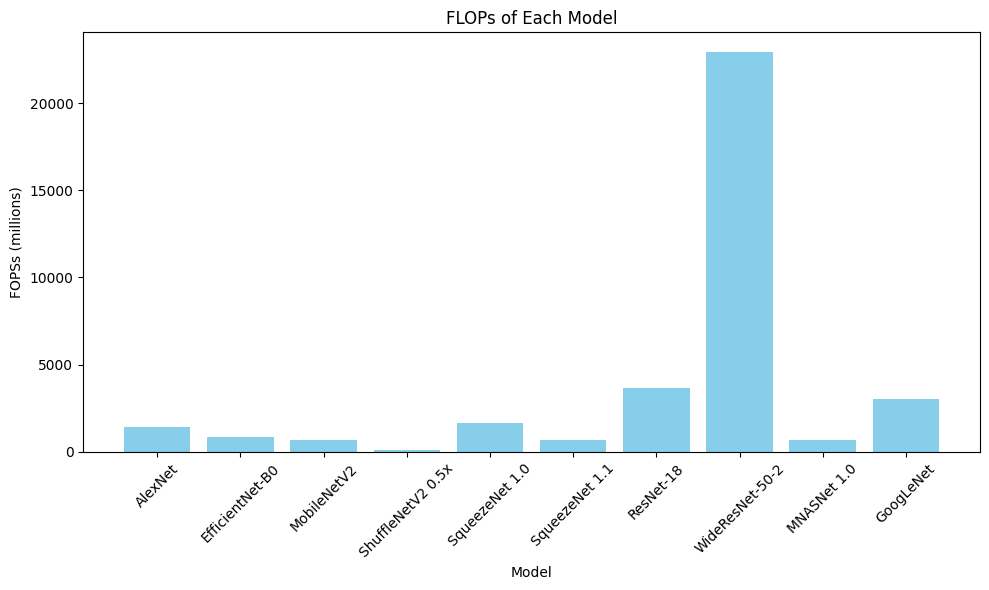

In [ ]:
import matplotlib.pyplot as plt

# Plot FLOPs
plt.figure(figsize=(10, 6))
plt.bar(model_names, flops_in_millions_cpu , color='skyblue')
plt.xlabel('Model')
plt.ylabel('FOPSs (millions)')
plt.title('FLOPs of Each Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

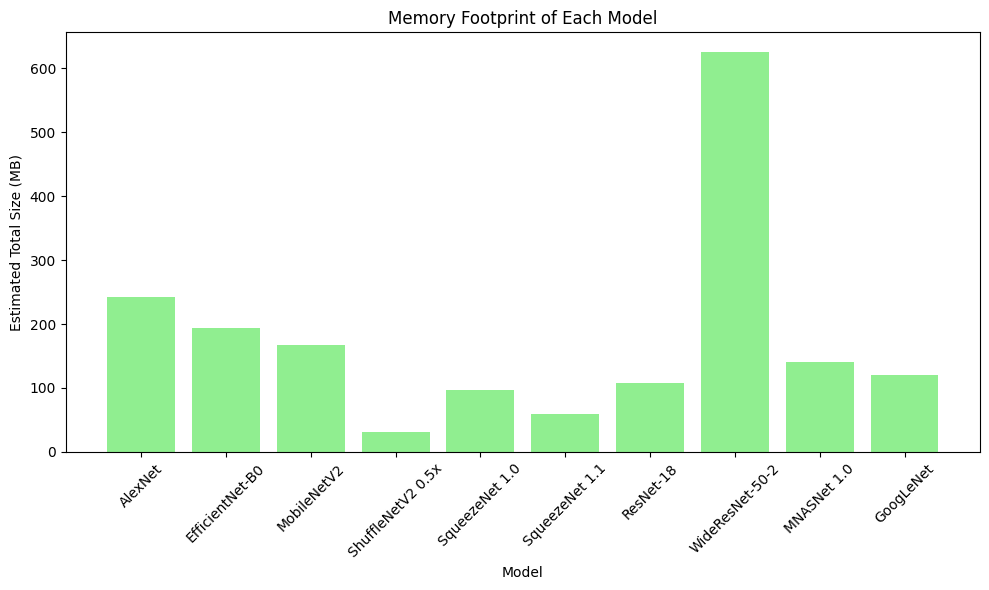

In [ ]:
# Plot parameters
plt.figure(figsize=(10, 6))
plt.bar(model_names, estimated_total_sizes, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Estimated Total Size (MB)')
plt.title('Memory Footprint of Each Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
# copied output of previous cell for runtime issues

model_names = ['AlexNet', 'EfficientNet-B0', 'MobileNetV2', 'ShuffleNetV2 0.5x', 'SqueezeNet 1.0', 'SqueezeNet 1.1', 'ResNet-18', 'WideResNet-50-2', 'MNASNet 1.0', 'GoogLeNet']
flops_cpu = [1428413824.0, 830290048.0, 654973440.0, 89144128.0, 1638189152.0, 698643872.0, 3648067584.0, 22911451136.0, 672484864.0, 3022664064.0]
flops_in_millions_cpu = [1428.413824, 830.290048, 654.97344, 89.144128, 1638.189152, 698.643872, 3648.067584, 22911.451136, 672.484864, 3022.664064]
op_intensity_cpu = [5.9018048341114735, 4.271039341563785, 3.9264638810622863, 2.8895989627228524, 16.864207864937203, 11.831394953429298, 33.79091871063357, 36.65128477092398, 4.780584801308026, 25.199366936223424]

In [80]:
estimated_total_size_mb = [242.03, 194.4, 166.81, 30.85, 97.14, 59.05, 107.96, 625.12, 140.67, 119.95]
params_cpu = [61100840.0, 5288548.0, 3504872.0, 1366792.0, 1248424.0, 1235496.0, 11689512.0, 68883240.0, 4383312.0, 6624904.0]
params_in_millions = [61.10084, 5.288548, 3.504872, 1.366792, 1.248424, 1.235496, 11.689512, 68.88324, 4.383312, 6.624904]

In [32]:
# find peak_flops, peak_memory_bandwidth for Colab CPU, and for Colab GPU
peak_flops_cpu = (2.200*2)*2*2*10**9 / 1000000
memory_bandwidth_cpu = 85*10**9 / 1000 # or 85, or 68, in GB/s
peak_flops_gpu = 8.1*10**12 / 10000000 # Peak performance of NVIDIA T4 GPU
memory_bandwidth_gpu = 320*10**9 / 1000 # GB/s

In [53]:
import matplotlib.pyplot as plt

def plot_roofline(device, peak_flops, peak_memory_bandwidth, model_flops, model_op_intensity):
    # Calculate the operational intensity
    operational_intensity = peak_flops / peak_memory_bandwidth

    # Plot the theoretical roofline (slanted part)
    plt.plot([0, operational_intensity], [0, peak_flops], color='red', label='Theoretical Roofline')

    # Plot the flat part of the roofline (limited by memory bandwidth)
    plt.plot([operational_intensity, 50], [peak_flops, peak_flops], color='red', linestyle='--', label='Flat Roofline')

    # Overlay model data points
    plt.scatter(model_op_intensity, model_flops, color='blue', label='Model Data Points')

    plt.xlabel('Operational Intensity (FLOPs/byte)')
    plt.ylabel('FLOPs/s')
    plt.title(f'Roofline Plot for {device}')
    plt.legend()
    plt.grid(True)
    plt.show()

# import matplotlib.pyplot as plt

# def plot_roofline_log(device, peak_flops, peak_memory_bandwidth, model_flops, model_op_intensity):
#     # Calculate the operational intensity
#     operational_intensity = peak_flops / peak_memory_bandwidth

#     # Plot the theoretical roofline (slanted part)
#     plt.plot([0, operational_intensity], [0, peak_flops], color='red', label='Theoretical Roofline')

#     # Plot the flat part of the roofline (limited by memory bandwidth)
#     plt.plot([operational_intensity, operational_intensity * 50], [peak_flops, peak_flops], color='red', linestyle='--', label='Flat Roofline')

#     # Overlay model data points
#     plt.scatter(model_op_intensity, model_flops, color='blue', label='Model Data Points')

#     plt.xlabel('Operational Intensity (FLOPs/byte)')
#     plt.ylabel('FLOPs/s')
#     plt.title(f'Roofline Plot for {device}')
#     plt.legend()
#     plt.grid(True)

#     # Set x and y axes to logarithmic scale
#     plt.xscale('log')
#     plt.yscale('log')

#     plt.show()

import matplotlib.pyplot as plt

def plot_roofline_log(device, peak_flops, peak_memory_bandwidth, model_flops, model_op_intensity, model_names):
    # Calculate the operational intensity
    operational_intensity = peak_flops / peak_memory_bandwidth

    # Plot the theoretical roofline (slanted part)
    plt.plot([0, operational_intensity], [0, peak_flops], color='red', label='Theoretical Roofline')

    # Plot the flat part of the roofline (limited by memory bandwidth)
    plt.plot([operational_intensity, operational_intensity * 10000000], [peak_flops, peak_flops], color='red', linestyle='--', label='Flat Roofline')

    # Define colors for different model names
    colors = {
        'AlexNet': 'blue',
        'EfficientNet-B0': 'green',
        'MobileNetV2': 'red',
        'ShuffleNetV2 0.5x': 'cyan',
        'SqueezeNet 1.0': 'magenta',
        'SqueezeNet 1.1': 'yellow',
        'ResNet-18': 'orange',
        'WideResNet-50-2': 'purple',
        'MNASNet 1.0': 'brown',
        'GoogLeNet': 'pink'
    }

    # Overlay model data points with different colors based on their names
    for model_name, op_intensity, flops in zip(model_names, model_op_intensity, model_flops):
        plt.scatter(op_intensity, flops, color=colors.get(model_name, 'black'), label=model_name)

    # Add vertical lines to mark operational intensity values
    for op_intensity in model_op_intensity:
        plt.axvline(x=op_intensity, color='gray', linestyle='--', linewidth=0.5)

    plt.xlabel('Operational Intensity (FLOPs/byte)')
    plt.ylabel('FLOPs/s')
    plt.title(f'Roofline Plot for {device}')
    plt.legend()
    plt.grid(True)

    # Set x and y axes to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')

    plt.show()



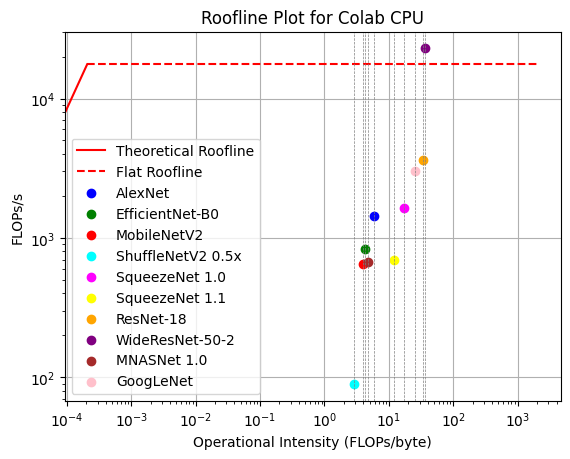

In [72]:
device = 'Colab CPU'
plot_roofline_log(device, peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, op_intensity_cpu, model_names)

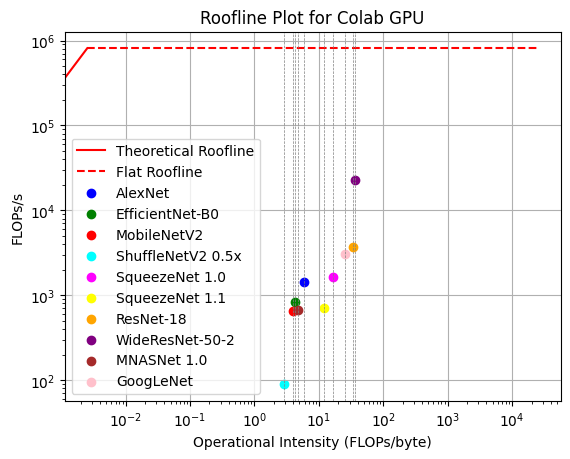

In [73]:
device = 'Colab GPU'
plot_roofline_log(device, peak_flops_gpu, memory_bandwidth_gpu, flops_in_millions_cpu, op_intensity_cpu, model_names)

# 3. DNN Performance Benchmarking (CPU & GPU)

In [111]:
import torch
import time
import matplotlib.pyplot as plt

# Define the batch sizes
batch_sizes = [1, 64, 256]

In [ ]:
inference_latency_cpu = []
throughput_cpu = []
inference_only_latency_cpu = []
throughput_only_cpu = []

for model_name,model in zip(model_names,models):
    model.to('cpu')  # Move model to CPU
    model.eval()  # Set model to evaluation mode
    # Measure inference latency on CPU
    for bs in batch_sizes:
        input_cpu = torch.randn(bs, 3, 224, 224)
        start = time.time()
        with torch.no_grad():
            model(input_cpu)
        end = time.time()
        latency = end - start
        throughput = (bs * 1.0 / latency)
        print(f'CPU batch size {bs}, model name {model_name}, latency {latency:.3f}, throughput {throughput:.3f}')
        inference_latency_cpu.append((bs,model_name,latency))
        throughput_cpu.append((bs,model_name,throughput))
        inference_only_latency_cpu.append(latency)
        throughput_only_cpu.append(throughput)

CPU batch size 1, model name AlexNet, latency 0.301, throughput 3.318
CPU batch size 64, model name AlexNet, latency 2.743, throughput 23.329
CPU batch size 256, model name AlexNet, latency 10.971, throughput 23.333
CPU batch size 1, model name EfficientNet-B0, latency 0.083, throughput 12.037
CPU batch size 64, model name EfficientNet-B0, latency 17.106, throughput 3.741
CPU batch size 256, model name EfficientNet-B0, latency 31.375, throughput 8.159
CPU batch size 1, model name MobileNetV2, latency 0.046, throughput 21.575
CPU batch size 64, model name MobileNetV2, latency 5.630, throughput 11.368
CPU batch size 256, model name MobileNetV2, latency 24.352, throughput 10.513
CPU batch size 1, model name ShuffleNetV2 0.5x, latency 0.026, throughput 38.206
CPU batch size 64, model name ShuffleNetV2 0.5x, latency 0.713, throughput 89.751
CPU batch size 256, model name ShuffleNetV2 0.5x, latency 3.409, throughput 75.089
CPU batch size 1, model name SqueezeNet 1.0, latency 0.063, throughpu

In [ ]:
print('inference_latency_cpu {}'.format(inference_latency_cpu))
print('throughput_cpu {}'.format(throughput_cpu))

inference_latency_cpu [(1, 'AlexNet', 0.3013451099395752), (64, 'AlexNet', 2.7433340549468994), (256, 'AlexNet', 10.971382141113281), (1, 'EfficientNet-B0', 0.08308005332946777), (64, 'EfficientNet-B0', 17.10632824897766), (256, 'EfficientNet-B0', 31.374753713607788), (1, 'MobileNetV2', 0.04634976387023926), (64, 'MobileNetV2', 5.6296916007995605), (256, 'MobileNetV2', 24.351736307144165), (1, 'ShuffleNetV2 0.5x', 0.026173830032348633), (64, 'ShuffleNetV2 0.5x', 0.7130849361419678), (256, 'ShuffleNetV2 0.5x', 3.4092764854431152), (1, 'SqueezeNet 1.0', 0.06266093254089355), (64, 'SqueezeNet 1.0', 6.380952835083008), (256, 'SqueezeNet 1.0', 25.648386478424072), (1, 'SqueezeNet 1.1', 0.044068098068237305), (64, 'SqueezeNet 1.1', 3.11022686958313), (256, 'SqueezeNet 1.1', 13.671751499176025), (1, 'ResNet-18', 0.11515188217163086), (64, 'ResNet-18', 6.8121466636657715), (256, 'ResNet-18', 26.437576293945312), (1, 'WideResNet-50-2', 0.6704697608947754), (64, 'WideResNet-50-2', 37.80053162574

In [ ]:
print('inference_only_latency_cpu {}'.format(inference_only_latency_cpu))
print('throughput_only_cpu {}'.format(throughput_only_cpu))

inference_only_latency_cpu [0.3013451099395752, 2.7433340549468994, 10.971382141113281, 0.08308005332946777, 17.10632824897766, 31.374753713607788, 0.04634976387023926, 5.6296916007995605, 24.351736307144165, 0.026173830032348633, 0.7130849361419678, 3.4092764854431152, 0.06266093254089355, 6.380952835083008, 25.648386478424072, 0.044068098068237305, 3.11022686958313, 13.671751499176025, 0.11515188217163086, 6.8121466636657715, 26.437576293945312, 0.6704697608947754, 37.80053162574768, 148.45675826072693, 0.03330802917480469, 3.7010483741760254, 19.9013831615448, 0.1456918716430664, 9.776825904846191, 42.15662384033203]
throughput_only_cpu [3.318454380097679, 23.329276973977127, 23.333432078779396, 12.036583511018387, 3.7413055021801584, 8.159426599386125, 21.575082945397494, 11.368295910012257, 10.512597408707004, 38.20610123791913, 89.75087925186274, 75.08924579542477, 15.958907080538317, 10.029850032446987, 9.981134689129558, 22.69215246030243, 20.577277055219465, 18.724740572956488

In [56]:
inference_only_latency_cpu = [0.3013451099395752, 2.7433340549468994, 10.971382141113281, 0.08308005332946777, 17.10632824897766, 31.374753713607788, 0.04634976387023926, 5.6296916007995605, 24.351736307144165, 0.026173830032348633, 0.7130849361419678, 3.4092764854431152, 0.06266093254089355, 6.380952835083008, 25.648386478424072, 0.044068098068237305, 3.11022686958313, 13.671751499176025, 0.11515188217163086, 6.8121466636657715, 26.437576293945312, 0.6704697608947754, 37.80053162574768, 148.45675826072693, 0.03330802917480469, 3.7010483741760254, 19.9013831615448, 0.1456918716430664, 9.776825904846191, 42.15662384033203]
throughput_only_cpu = [3.318454380097679, 23.329276973977127, 23.333432078779396, 12.036583511018387, 3.7413055021801584, 8.159426599386125, 21.575082945397494, 11.368295910012257, 10.512597408707004, 38.20610123791913, 89.75087925186274, 75.08924579542477, 15.958907080538317, 10.029850032446987, 9.981134689129558, 22.69215246030243, 20.577277055219465, 18.724740572956488, 8.684182847393899, 9.394982691925799, 9.683187186059437, 1.4914915754969322, 1.6930978810998165, 1.724407854510742, 30.022791043921433, 17.29239759376247, 12.863427527724086, 6.863800902015461, 6.5460918116866935, 6.072592553179745]

In [64]:
flops_extended = flops_in_millions_cpu
params_extended = params_in_millions

In [74]:
print('flops {}'.format(flops_in_millions_cpu))

flops [1428.413824, 830.290048, 654.97344, 89.144128, 1638.189152, 698.643872, 3648.067584, 22911.451136, 672.484864, 3022.664064]


In [ ]:
inference_latency_gpu = []
throughput_gpu = []
inference_only_latency_gpu = []
throughput_only_gpu = []

if torch.cuda.is_available():
  for model_name,model in zip(model_names,cuda_models):
          model.to('cuda')
          for bs in batch_sizes:
              input_gpu = torch.randn(bs, 3, 224, 224).cuda()
              start = time.time()
              with torch.no_grad():
                  model(input_gpu)
              end = time.time()
              gpu_latency = end - start
              gpu_throughput = (bs * 1.0 / gpu_latency)
              print(f'GPU batch size {bs}, model name {model_name}, latency {gpu_latency:.3f}, throughput {gpu_throughput:.3f}')
              inference_latency_gpu.append((bs,model_name,gpu_latency))
              throughput_gpu.append((bs,model_name,gpu_throughput))
              inference_only_latency_gpu.append(gpu_latency)
              throughput_only_gpu.append(gpu_throughput)

GPU batch size 1, model name AlexNet, latency 1.340, throughput 0.746
GPU batch size 64, model name AlexNet, latency 0.065, throughput 977.665
GPU batch size 256, model name AlexNet, latency 0.033, throughput 7660.392
GPU batch size 1, model name EfficientNet-B0, latency 0.529, throughput 1.891
GPU batch size 64, model name EfficientNet-B0, latency 0.208, throughput 307.095
GPU batch size 256, model name EfficientNet-B0, latency 0.102, throughput 2498.480
GPU batch size 1, model name MobileNetV2, latency 0.065, throughput 15.433
GPU batch size 64, model name MobileNetV2, latency 0.135, throughput 473.011
GPU batch size 256, model name MobileNetV2, latency 0.053, throughput 4861.222
GPU batch size 1, model name ShuffleNetV2 0.5x, latency 0.202, throughput 4.941
GPU batch size 64, model name ShuffleNetV2 0.5x, latency 0.067, throughput 954.807
GPU batch size 256, model name ShuffleNetV2 0.5x, latency 0.034, throughput 7633.489
GPU batch size 1, model name SqueezeNet 1.0, latency 0.067, t

In [ ]:
print('inference_latency_gpu {}'.format(inference_latency_gpu))
print('throughput_gpu {}'.format(throughput_gpu))

inference_latency_gpu [(1, 'AlexNet', 1.3401403427124023), (64, 'AlexNet', 0.06546211242675781), (256, 'AlexNet', 0.03341865539550781), (1, 'EfficientNet-B0', 0.5289397239685059), (64, 'EfficientNet-B0', 0.208404541015625), (256, 'EfficientNet-B0', 0.1024622917175293), (1, 'MobileNetV2', 0.06479740142822266), (64, 'MobileNetV2', 0.13530349731445312), (256, 'MobileNetV2', 0.05266165733337402), (1, 'ShuffleNetV2 0.5x', 0.20238685607910156), (64, 'ShuffleNetV2 0.5x', 0.06702923774719238), (256, 'ShuffleNetV2 0.5x', 0.033536434173583984), (1, 'SqueezeNet 1.0', 0.06733417510986328), (64, 'SqueezeNet 1.0', 0.05835270881652832), (256, 'SqueezeNet 1.0', 0.058997392654418945), (1, 'SqueezeNet 1.1', 0.035659074783325195), (64, 'SqueezeNet 1.1', 0.02548074722290039), (256, 'SqueezeNet 1.1', 0.019164562225341797), (1, 'ResNet-18', 0.04385089874267578), (64, 'ResNet-18', 0.022041797637939453), (256, 'ResNet-18', 0.022433757781982422), (1, 'WideResNet-50-2', 0.06559205055236816), (64, 'WideResNet-50

In [ ]:
print('inference_only_latency_gpu {}'.format(inference_only_latency_gpu))
print('throughput_only_gpu {}'.format(throughput_only_gpu))

inference_only_latency_gpu [1.3401403427124023, 0.06546211242675781, 0.03341865539550781, 0.5289397239685059, 0.208404541015625, 0.1024622917175293, 0.06479740142822266, 0.13530349731445312, 0.05266165733337402, 0.20238685607910156, 0.06702923774719238, 0.033536434173583984, 0.06733417510986328, 0.05835270881652832, 0.058997392654418945, 0.035659074783325195, 0.02548074722290039, 0.019164562225341797, 0.04385089874267578, 0.022041797637939453, 0.022433757781982422, 0.06559205055236816, 0.044290781021118164, 0.051743507385253906, 0.031200885772705078, 0.03108072280883789, 0.03402233123779297, 0.12944912910461426, 0.12984228134155273, 0.08226943016052246]
throughput_only_gpu [0.7461905056719889, 977.6647533580024, 7660.3919867587465, 1.8905745866414487, 307.09503587640944, 2498.4801306781956, 15.432717639267054, 473.01068538723956, 4861.221863554254, 4.941032334674722, 954.807217730605, 7633.488959349363, 14.851299483039444, 1096.7785608929964, 4339.1748089536195, 28.04335238859359, 2511

In [62]:
inference_only_latency_gpu = [1.3401403427124023, 0.06546211242675781, 0.03341865539550781, 0.5289397239685059, 0.208404541015625, 0.1024622917175293, 0.06479740142822266, 0.13530349731445312, 0.05266165733337402, 0.20238685607910156, 0.06702923774719238, 0.033536434173583984, 0.06733417510986328, 0.05835270881652832, 0.058997392654418945, 0.035659074783325195, 0.02548074722290039, 0.019164562225341797, 0.04385089874267578, 0.022041797637939453, 0.022433757781982422, 0.06559205055236816, 0.044290781021118164, 0.051743507385253906, 0.031200885772705078, 0.03108072280883789, 0.03402233123779297, 0.12944912910461426, 0.12984228134155273, 0.08226943016052246]
throughput_only_gpu = [0.7461905056719889, 977.6647533580024, 7660.3919867587465, 1.8905745866414487, 307.09503587640944, 2498.4801306781956, 15.432717639267054, 473.01068538723956, 4861.221863554254, 4.941032334674722, 954.807217730605, 7633.488959349363, 14.851299483039444, 1096.7785608929964, 4339.1748089536195, 28.04335238859359, 2511.7002825757436, 13357.988405364385, 22.804549705313065, 2903.5744294213087, 11411.373987714413, 15.245749928211318, 1444.9959681109335, 4947.480620012165, 32.05037213638378, 2059.154170693914, 7524.469684653119, 7.725042315208243, 492.9056955772882, 3111.7269136360605]

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_latency_vs_flops(model_names, latencies, flops):
    # Define batch sizes
    batch_sizes = [1, 64, 256]

    # Define colors for different models
    model_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

    # Define symbol shapes for different batch sizes
    symbol_shapes = ['o', '^', 's']

    # Plot latency vs FLOPs
    plt.figure(figsize=(10, 6))
    for i, model_name in enumerate(model_names):
        model_latencies = latencies[i * len(batch_sizes): (i + 1) * len(batch_sizes)]
        model_flops = flops[i]
        model_color = model_colors[i]
        for j, batch_size in enumerate(batch_sizes):
            latency = model_latencies[j]
            flop = model_flops
            symbol_shape = symbol_shapes[j]
            plt.scatter(flop, latency, color=model_color, marker=symbol_shape, label=None)

    # Create separate legend entries for model colors and batch size shapes
    model_legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_colors[i], markersize=10, label=model_name) for i, model_name in enumerate(model_names)]
    batch_size_legend_handles = [plt.Line2D([0], [0], marker=symbol_shapes[i], color='w', markerfacecolor='black', markersize=10, label=f'Batch Size {batch_sizes[i]}') for i in range(len(batch_sizes))]
    plt.legend(handles=model_legend_handles + batch_size_legend_handles, loc='upper right')

    plt.xlabel('FLOPs (millions)')
    plt.ylabel('Inference Latency')
    plt.title('Inference Latency vs. FLOPs for Different Models and Batch Sizes')
    plt.grid(True)
    plt.show()


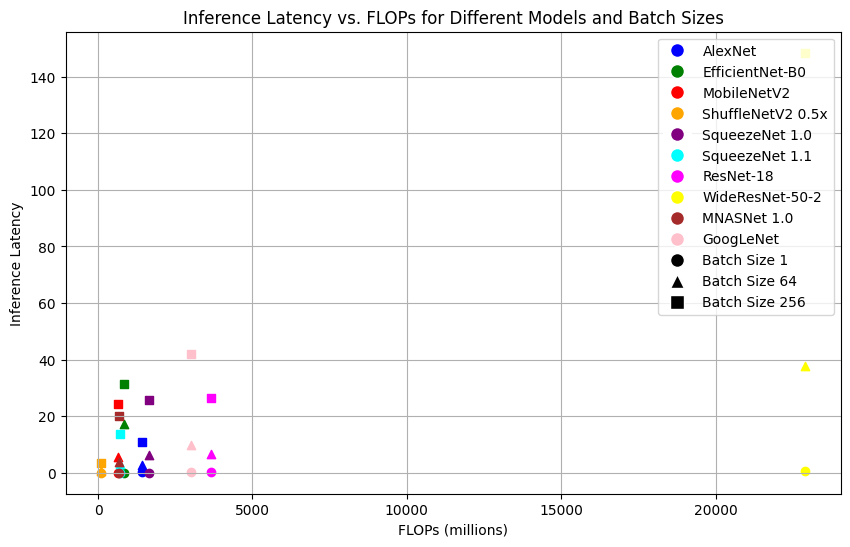

In [102]:
plot_latency_vs_flops(model_names,inference_only_latency_cpu,flops_in_millions_cpu)

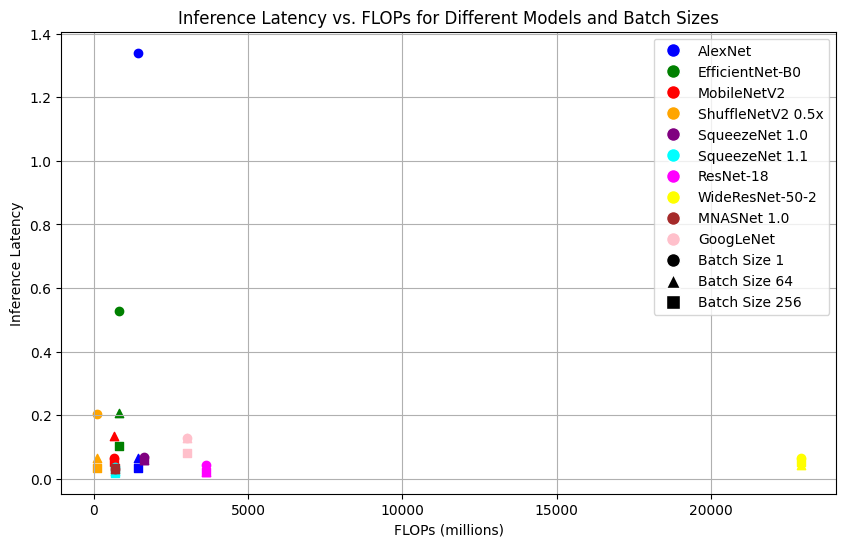

In [103]:
plot_latency_vs_flops(model_names,inference_only_latency_gpu,flops_in_millions_cpu)

In [106]:
import matplotlib.pyplot as plt
import numpy as np

def plot_latency_vs_params(model_names, latencies, params):
    # Define batch sizes
    batch_sizes = [1, 64, 256]

    # Define colors for different models
    model_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

    # Define symbol shapes for different batch sizes
    symbol_shapes = ['o', '^', 's']

    # Plot latency vs FLOPs
    plt.figure(figsize=(10, 6))
    for i, model_name in enumerate(model_names):
        model_latencies = latencies[i * len(batch_sizes): (i + 1) * len(batch_sizes)]
        model_flops = params[i]
        model_color = model_colors[i]
        for j, batch_size in enumerate(batch_sizes):
            latency = model_latencies[j]
            flop = model_flops
            symbol_shape = symbol_shapes[j]
            plt.scatter(flop, latency, color=model_color, marker=symbol_shape, label=None)

    # Create separate legend entries for model colors and batch size shapes
    model_legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_colors[i], markersize=10, label=model_name) for i, model_name in enumerate(model_names)]
    batch_size_legend_handles = [plt.Line2D([0], [0], marker=symbol_shapes[i], color='w', markerfacecolor='black', markersize=10, label=f'Batch Size {batch_sizes[i]}') for i in range(len(batch_sizes))]
    plt.legend(handles=model_legend_handles + batch_size_legend_handles, loc='upper right')

    plt.xlabel('Params (millions)')
    plt.ylabel('Inference Latency')
    plt.title('Inference Latency vs. Params for Different Models and Batch Sizes')
    plt.grid(True)
    plt.show()


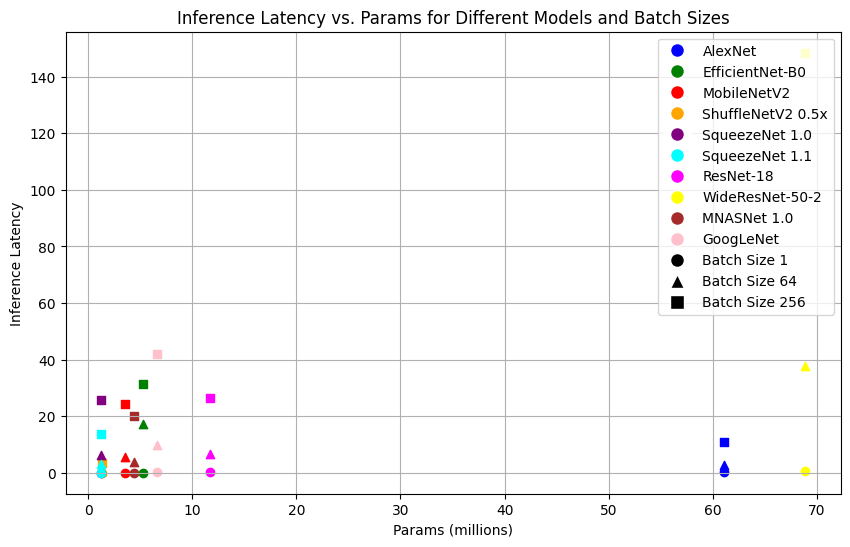

In [109]:
plot_latency_vs_params(model_names,inference_only_latency_cpu,params_in_millions)

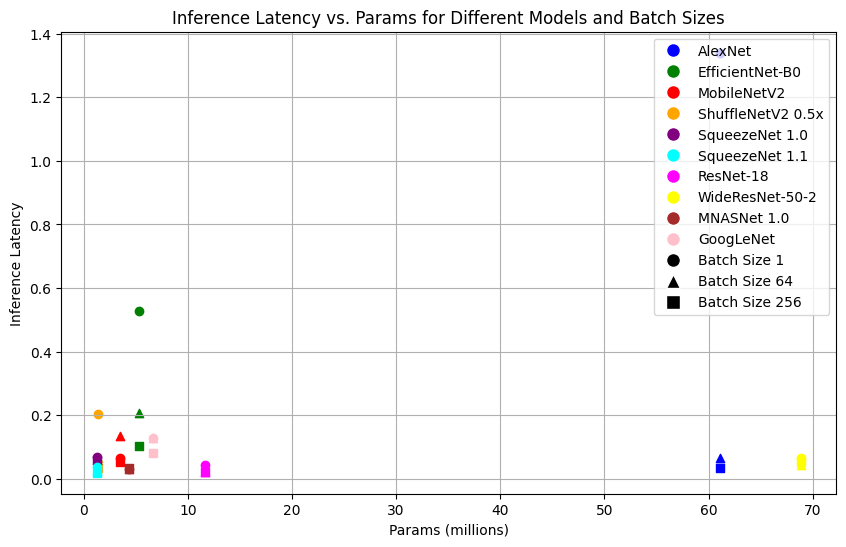

In [108]:
plot_latency_vs_params(model_names,inference_only_latency_gpu,params_in_millions)

In [81]:
flops_extended = flops_in_millions_cpu * 3
params_extended = params_in_millions * 3

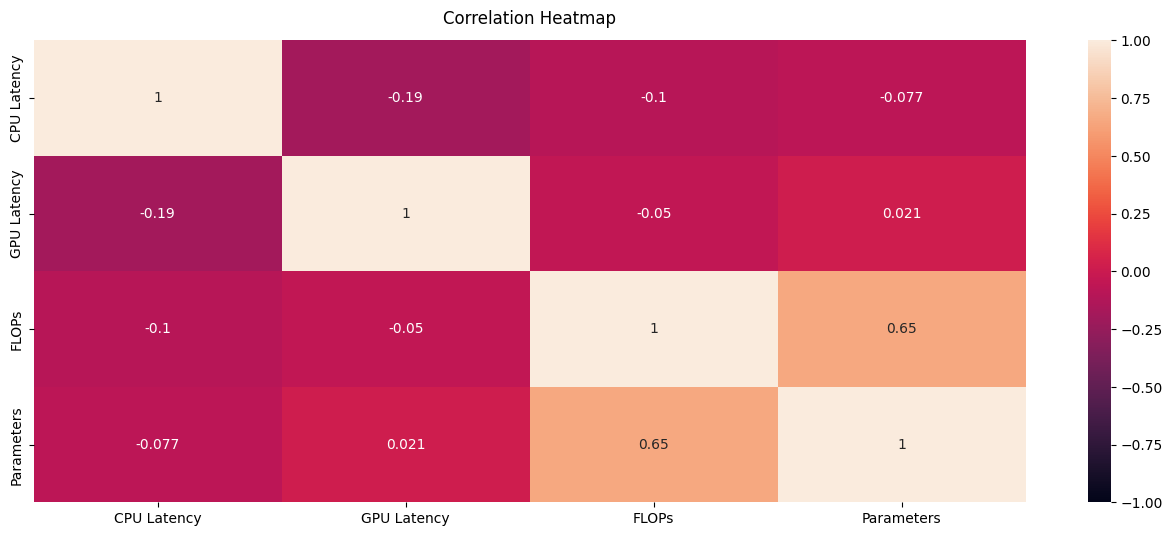

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
data = {'CPU Latency': np.array(inference_only_latency_cpu),
        'GPU Latency': np.array(inference_only_latency_gpu),
        'FLOPs': np.array(flops_extended),
        'Parameters': np.array(params_extended)}
df = pd.DataFrame(data, columns=['CPU Latency','GPU Latency', 'FLOPs', 'Parameters'])
fig = plt.figure(figsize=(16, 6))
corr = df.corr(method = 'spearman')
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
fig.savefig('spearman_correlation_coefficients.png')

In [113]:
import matplotlib.pyplot as plt

def plot_throughput_vs_batch_size(model_names, throughputs):
    # Define batch sizes
    batch_sizes = [1, 64, 256]

    # Define colors for different models
    model_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

    # Define symbol shapes for different batch sizes
    symbol_shapes = ['o', '^', 's']

    # Plot throughput vs batch size
    plt.figure(figsize=(10, 6))
    for i, model_name in enumerate(model_names):
        model_throughputs = throughputs[i * len(batch_sizes): (i + 1) * len(batch_sizes)]
        model_color = model_colors[i]
        for j, batch_size in enumerate(batch_sizes):
            throughput = model_throughputs[j]
            symbol_shape = symbol_shapes[j]
            plt.scatter(batch_size, throughput, color=model_color, marker=symbol_shape, label=None)

    # Create separate legend entries for model colors
    model_legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_colors[i], markersize=10, label=model_name) for i, model_name in enumerate(model_names)]
    plt.legend(handles=model_legend_handles, loc='upper right')

    plt.xlabel('Batch Size')
    plt.ylabel('Throughput')
    plt.title('Throughput vs. Batch Size for Different Models')
    plt.grid(True)
    plt.show()

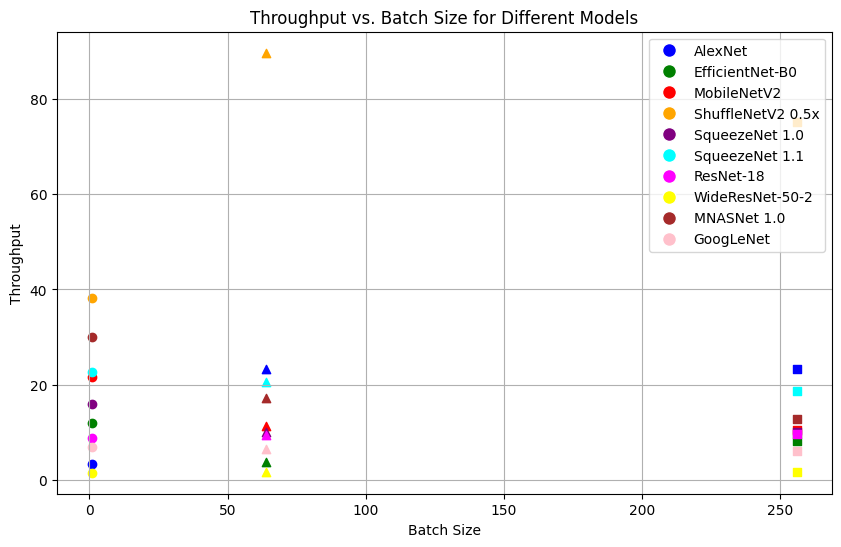

In [114]:
plot_throughput_vs_batch_size(model_names, throughput_only_cpu)

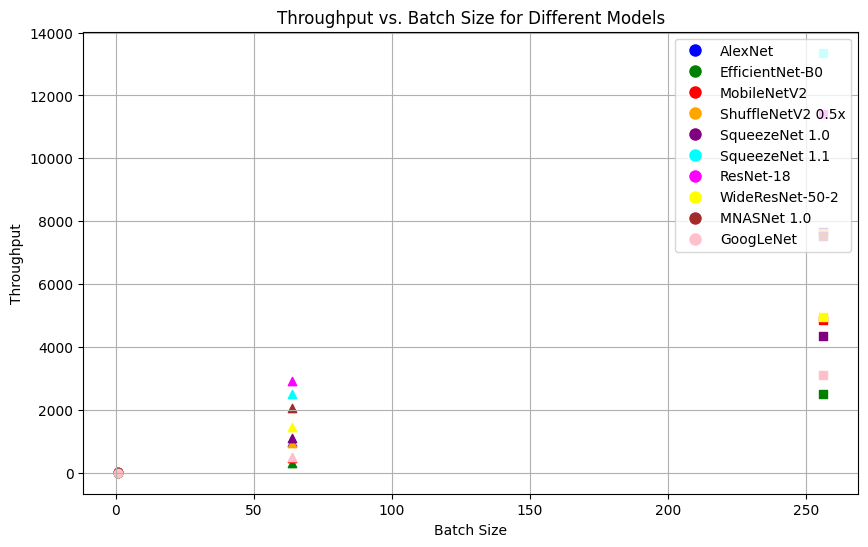

<Figure size 640x480 with 0 Axes>

In [116]:
plot_throughput_vs_batch_size(model_names, throughput_only_gpu)
plt.savefig('GPU_throughput_vs_batch_size.png')

# 4. Hardware Utilization & Peak Performance

In [118]:
def plot_roofline_log(device, peak_flops, peak_memory_bandwidth, model_flops_theoretical, model_flops_observed, model_op_intensity, model_names):
    # Calculate the operational intensity
    operational_intensity = peak_flops / peak_memory_bandwidth

    # Plot the theoretical roofline (slanted part)
    plt.plot([0, operational_intensity], [0, peak_flops], color='red', label='Theoretical Roofline')

    # Plot the flat part of the roofline (limited by memory bandwidth)
    plt.plot([operational_intensity, operational_intensity * 10000000], [peak_flops, peak_flops], color='red', linestyle='--', label='Flat Roofline')

    # Define colors for different model names
    colors = {
        'AlexNet': 'blue',
        'EfficientNet-B0': 'green',
        'MobileNetV2': 'red',
        'ShuffleNetV2 0.5x': 'cyan',
        'SqueezeNet 1.0': 'magenta',
        'SqueezeNet 1.1': 'yellow',
        'ResNet-18': 'orange',
        'WideResNet-50-2': 'purple',
        'MNASNet 1.0': 'brown',
        'GoogLeNet': 'pink'
    }

    # Overlay model data points with different colors based on their names
    for model_name, op_intensity, flops_theoretical, flops_observed in zip(model_names, model_op_intensity, model_flops_theoretical, model_flops_observed):
        plt.scatter(op_intensity, flops_theoretical, color=colors.get(model_name, 'black'), marker='o', label=model_name + ' (Theoretical)')
        plt.scatter(op_intensity, flops_observed, color=colors.get(model_name, 'black'), marker='x', label=model_name + ' (Observed)')

    # Add vertical lines to mark operational intensity values
    for op_intensity in model_op_intensity:
        plt.axvline(x=op_intensity, color='gray', linestyle='--', linewidth=0.5)

    plt.xlabel('Operational Intensity (FLOPs/byte)')
    plt.ylabel('FLOPs/s')
    plt.title(f'Roofline Plot for {device}')
    plt.legend()
    plt.grid(True)

    # Set x and y axes to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')

    plt.show()


In [117]:
cpu_throughput_bs_1 = throughput_only_cpu[::3]
cpu_throughput_bs_64 = throughput_only_cpu[1::3]
cpu_throughput_bs_256 = throughput_only_cpu[2::3]

gpu_throughput_bs_1 = throughput_only_gpu[::3]
gpu_throughput_bs_64 = throughput_only_gpu[1::3]
gpu_throughput_bs_256 = throughput_only_gpu[2::3]

# result = [x * y for x, y in zip(list1, list2)]
cpu_flops_bs_1 = [x * y for x,y in zip(cpu_throughput_bs_1,flops_in_millions_cpu)]
cpu_flops_bs_64 = [x * y for x,y in zip(cpu_throughput_bs_64,flops_in_millions_cpu)]
cpu_flops_bs_256 = [x * y for x,y in zip(cpu_throughput_bs_256,flops_in_millions_cpu)]

gpu_flops_bs_1 = [x * y for x,y in zip(gpu_throughput_bs_1,flops_in_millions_cpu)]
gpu_flops_bs_64 = [x * y for x,y in zip(gpu_throughput_bs_64,flops_in_millions_cpu)]
gpu_flops_bs_256 = [x * y for x,y in zip(gpu_throughput_bs_256,flops_in_millions_cpu)]

In [122]:
print(cpu_throughput_bs_1)

[3.318454380097679, 12.036583511018387, 21.575082945397494, 38.20610123791913, 15.958907080538317, 22.69215246030243, 8.684182847393899, 1.4914915754969322, 30.022791043921433, 6.863800902015461]


In [ ]:
# peak_flops_cpu = (2.200*2)*2*2*10**9 / 1000000
# memory_bandwidth_cpu = 85*10**9 / 1000 # or 85, or 68, in GB/s
# peak_flops_gpu = 8.1*10**12 / 10000000 # Peak performance of NVIDIA T4 GPU
# memory_bandwidth_gpu = 320*10**9 / 1000 # GB/s

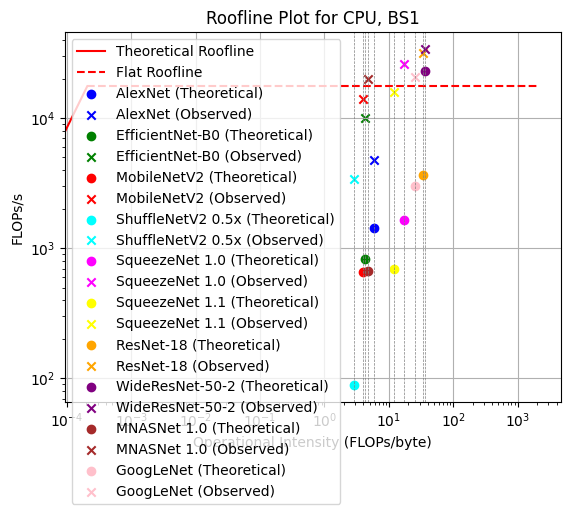

In [119]:
plot_roofline_log('CPU, BS1', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, cpu_flops_bs_1, op_intensity_cpu, model_names)

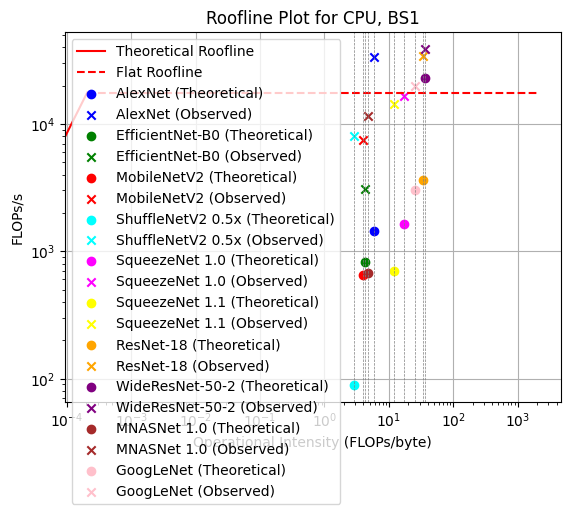

In [120]:
plot_roofline_log('CPU, BS1', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, cpu_flops_bs_64, op_intensity_cpu, model_names)

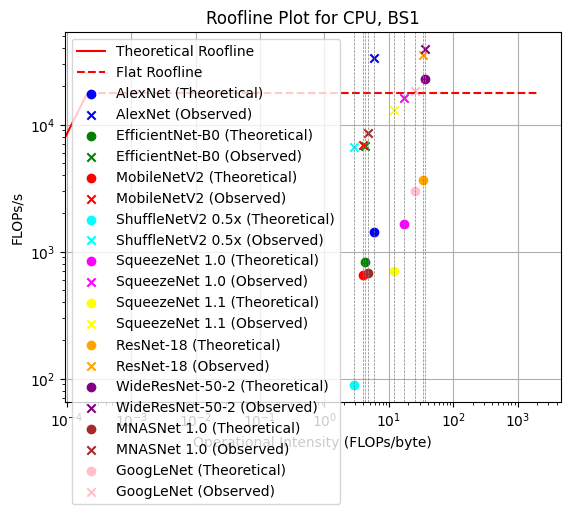

In [121]:
plot_roofline_log('CPU, BS1', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, cpu_flops_bs_256, op_intensity_cpu, model_names)

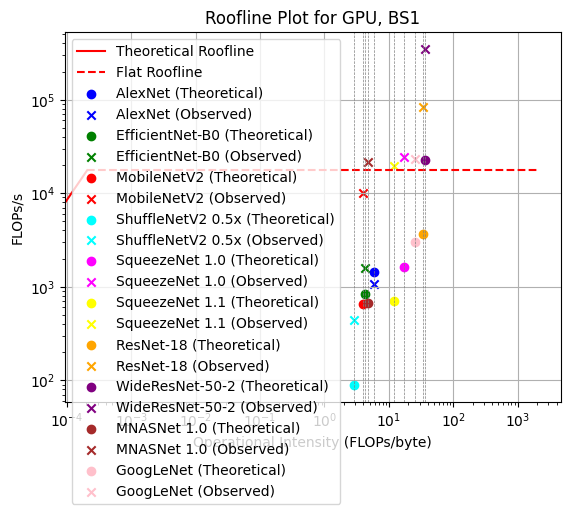

In [123]:
plot_roofline_log('GPU, BS1', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, gpu_flops_bs_1, op_intensity_cpu, model_names)

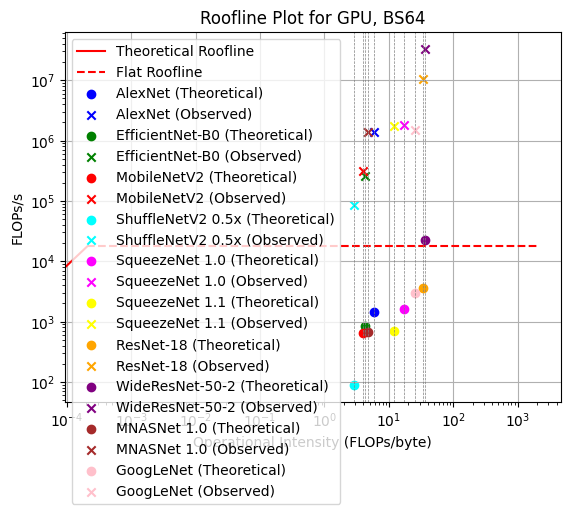

In [124]:
plot_roofline_log('GPU, BS64', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, gpu_flops_bs_64, op_intensity_cpu, model_names)

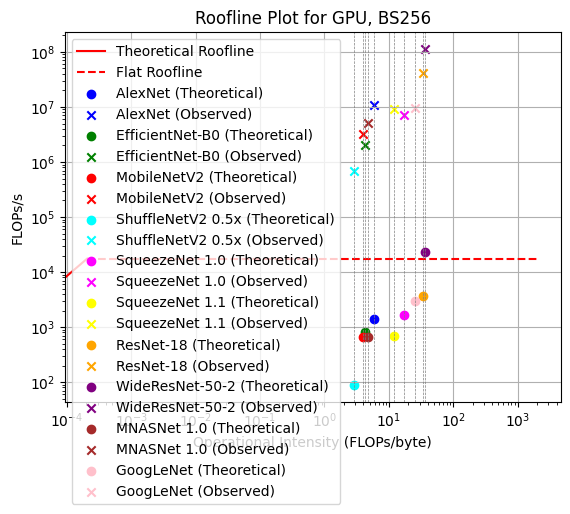

In [125]:
plot_roofline_log('GPU, BS256', peak_flops_cpu, memory_bandwidth_cpu, flops_in_millions_cpu, gpu_flops_bs_256, op_intensity_cpu, model_names)